### zastosowanie metod dra Kontka - podsumowanie

W notatniku `kontek.ipynb` zastosowano [metody zaproponowane przez dr. Kontka](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5296441) wraz z komentarzami i wątpliwościami.

W szczególności zwrócono uwagę na trzy kwestie:

* Wykrywanie outlierów: Za potencjalne obserwacje odstające uznano komisje, w których wystąpiła choćby jedna anomalia. Wydaje się jednak, że za rzeczywiście podejrzane należałoby uznać przypadki, w których wystąpiły np. minimum trzy na cztery "wykroczenia". Wyjątkiem może być sytuacja, w której kandydat uzyskuje mniejszą liczbę głosów w drugiej turze niż w pierwszej — co samo w sobie budzi poważne wątpliwości. Tego rodzaju przypadki powinny być identyfikowane już na etapie wprowadzania danych do systemu

* Clustrowanie po kodach pocztowych: Choć intuicyjne, może być w niektórych przypadkach nietrafione — kody pocztowe nie zawsze dobrze odwzorowują rzeczywiste granice geograficzne czy społeczne. Dodatkowo, nie usunięto komisji o bardzo specyficznym charakterze (szpitale, domy pomocy społecznej, areszty śledcze, zakłady karne czy komisje zagraniczne) - których wyniki mogą odbiegać od "typowej" komisji

* Jednostronność analizy: Autor analizuje tylko jedną stronę — i takie podejście tłumaczy "brakiem czasu". Jednak — jak pokazano w niniejszym kodzie — rozszerzenie analizy na przypadki odwrotne lub inne lata nie wymagało istotnie większego nakładu pracy. Trudno więc oprzeć się wrażeniu, że wybór ten był przynajmniej częściowo celowy, co stawia pod znakiem zapytania obiektywność całej analizy

Mimo wspomnianych zastrzeżeń, zaproponowane metody są interesujące i — po niewielkim dostosowaniu — mogą być bardzo użyteczne w praktyce, zwłaszcza przy okazji kolejnych wyborów. Przykładowe zastosowania to:

* automatyczne ostrzeganie podczas wprowadzania wyników do systemu, gdy dane z danej komisji znacząco odbiegają od wzorca grupy;

* analiza po zakończeniu głosowania, służąca do wskazania kilku komisji, które warto objąć dodatkową weryfikacją lub ponownym przeliczeniem głosów.

Takie podejścia mogą realnie zwiększyć wiarygodność procesu wyborczego, przy jednoczesnym zachowaniu szacunku dla jego demokratycznych fundamentów.

Dla porównania, w plikach `kontek_2020` oraz `kontek_2015` zaimplementowano te same algorytmy, lecz na danych z lat odpowiednio 2020 i 2015.

Tutaj chciałbym tylko porównać te wyniki


In [3]:
# ustalamy k na poziomie 2
k = 2

### 1. Nadmierne poparcie dla kandydata A (względem mediany w ramach lokalnej grupy)

| Rok  | Kandydat        | Liczba anomalii |
|------|------------------|------------------|
| 2025 | Trzaskowski      | 4551             |
| 2025 | Nawrocki         | 3750             |
| 2020 | Trzaskowski      | 3430             |
| 2020 | Duda             | 2893             |
| 2015 | Komorowski       | 3206             |
| 2015 | Duda             | 2928             |

### 2. Nadmierny względny wzrost poparcia dla kandydata A między pierwszą a drugą turą, w porównaniu do odpowiedniego wzrostu poparcia dla kandydata B o w tej samej grupie lokalnej;

| Rok  | Kandydat        | Liczba anomalii |
|------|------------------|------------------|
| 2025 | Trzaskowski      | 3552             |
| 2025 | Nawrocki         | 3127             |
| 2020 | Trzaskowski      | 3795             |
| 2020 | Duda             | 1863             |
| 2015 | Komorowski       | 2754             |
| 2015 | Duda             | 3074             |

### 3. Komisje, w których kandydat A uzyskał więcej głosów niż kandydat B w drugiej turze, mimo że mediana wyników w grupie wskazywała na przewagę kandydata B;

| Rok  | Kandydat        | Liczba anomalii |
|------|------------------|------------------|
| 2025 | Trzaskowski      | 1885             |
| 2025 | Nawrocki         | 1843             |
| 2020 | Trzaskowski      | 2608             |
| 2020 | Duda             | 1999             |
| 2015 | Komorowski       | 1806             |
| 2015 | Duda             | 1750             |

### 4. Kandydat otrzymał mniej głosów w drugiej turze niż w pierwszej

| Rok  | Kandydat        | Liczba anomalii |
|------|------------------|------------------|
| 2025 | Trzaskowski      | 128              |
| 2025 | Nawrocki         | 112             |
| 2020 | Trzaskowski      | 106              |
| 2020 | Duda             | 284              |
| 2015 | Komorowski       | 286              |
| 2015 | Duda             | 93               |

### Sumowanie anomalii


Ilość komisji, w których występuję ≥ n anomalii na korzyść kandydata:


| Rok  | Kandydat     | 1 anomalia | 2 anomalie | 3 anomalie | 4 anomalie |
|------|--------------|------------|------------|------------|------------|
| 2025 | Trzaskowski  | 8161       | 1179       | 34         | 3          |
| 2025 | Nawrocki     | 6871       | 483        | 34         | 2          |
| 2020 | Trzaskowski  | 8406       | 962        | 24         | 2          |
| 2020 | Duda         | 6243       | 571        | 47         | 0          |
| 2015 | Komorowski   | 7073       | 756        | 30         | 0          |
| 2015 | Duda         | 7124       | 842        | 71         | 1          |


### Komentarz
Jak widać, wyniki z roku 2025 nie odbiegają istotnie od danych z lat wcześniejszych. Rozkład liczby anomalii — niezależnie od kandydata — pozostaje na porównywalnym poziomie w każdej analizowanej elekcji.

Oczywiście nie oznacza to, że błędy nie występują. Przy ponad 32 tysiącach komisji wyborczych, ludzki błąd oraz statystyczne odchylenia są nieuniknione. To naturalny element każdego dużego procesu organizacyjnego.

Warto jednak zaznaczyć, że [liczba komisji wyborczych się zmienia](https://demagog.org.pl/wypowiedzi/protesty-wyborcze-czy-wzrost-liczby-komisji-ma-znaczenie/), co oznacza, że nie powinniśmy porównywać wyników nominalnie. Większa liczba komisji to większa skala operacji i naturalnie większa liczba miejsc, w których może dojść do błędu — bez względu na intencje.

Nie powinniśmy jednak na podstawie jednostkowych przypadków tracić zaufania do instytucji państwowych ani podważać fundamentów demokracji. Wyciąganie ogólnych wniosków na podstawie kilku obserwacji może prowadzić do niepotrzebnej polaryzacji i chaosu informacyjnego.

To, co możemy i powinniśmy robić, to stale udoskonalać systemy liczenia i rejestrowania głosów — zarówno po stronie technicznej (informatycznej), jak i organizacyjnej, by minimalizować ryzyko pomyłek i zwiększać przejrzystość procesu.

#### Źródła

* [Raport Fundacji Batorego](https://www.batory.org.pl/publikacja/falszerstwa-czy-falszywe-alarmy-statystyczna-kontrola-wynikow-ii-tury-wyborow-prezydenckich-2025/)

* [danetyka.com](https://danetyka.com/kontek-analiza-bledow/)

* [analiza Jakuba Białka](https://github.com/rabitwhte/analiza_kontka_reprodukcja/blob/main/Reprodukcja_wynikow_Kontek_Bialek.ipynb)

In [10]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 21.1 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [14]:
# len(df)

# komisje w 2025 - 31627
# komisje w 2020 - 27221
# komisje w 2015 - 27817



/var/folders/27/sdwyh2gs5mx77yx8h4jgxnjw0000gn/T/ipykernel_56006/4125405743.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df.index, rotation=45, ha="right")
/var/folders/27/sdwyh2gs5mx77yx8h4jgxnjw0000gn/T/ipykernel_56006/4125405743.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df.index, rotation=45, ha="right")
/var/folders/27/sdwyh2gs5mx77yx8h4jgxnjw0000gn/T/ipykernel_56006/4125405743.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(plot_df.index, rotation=45, ha="right")
/var/folders/27/sdwyh2gs5mx77yx8h4jgxnjw0000gn/T/ipykernel_56006/4125405743.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

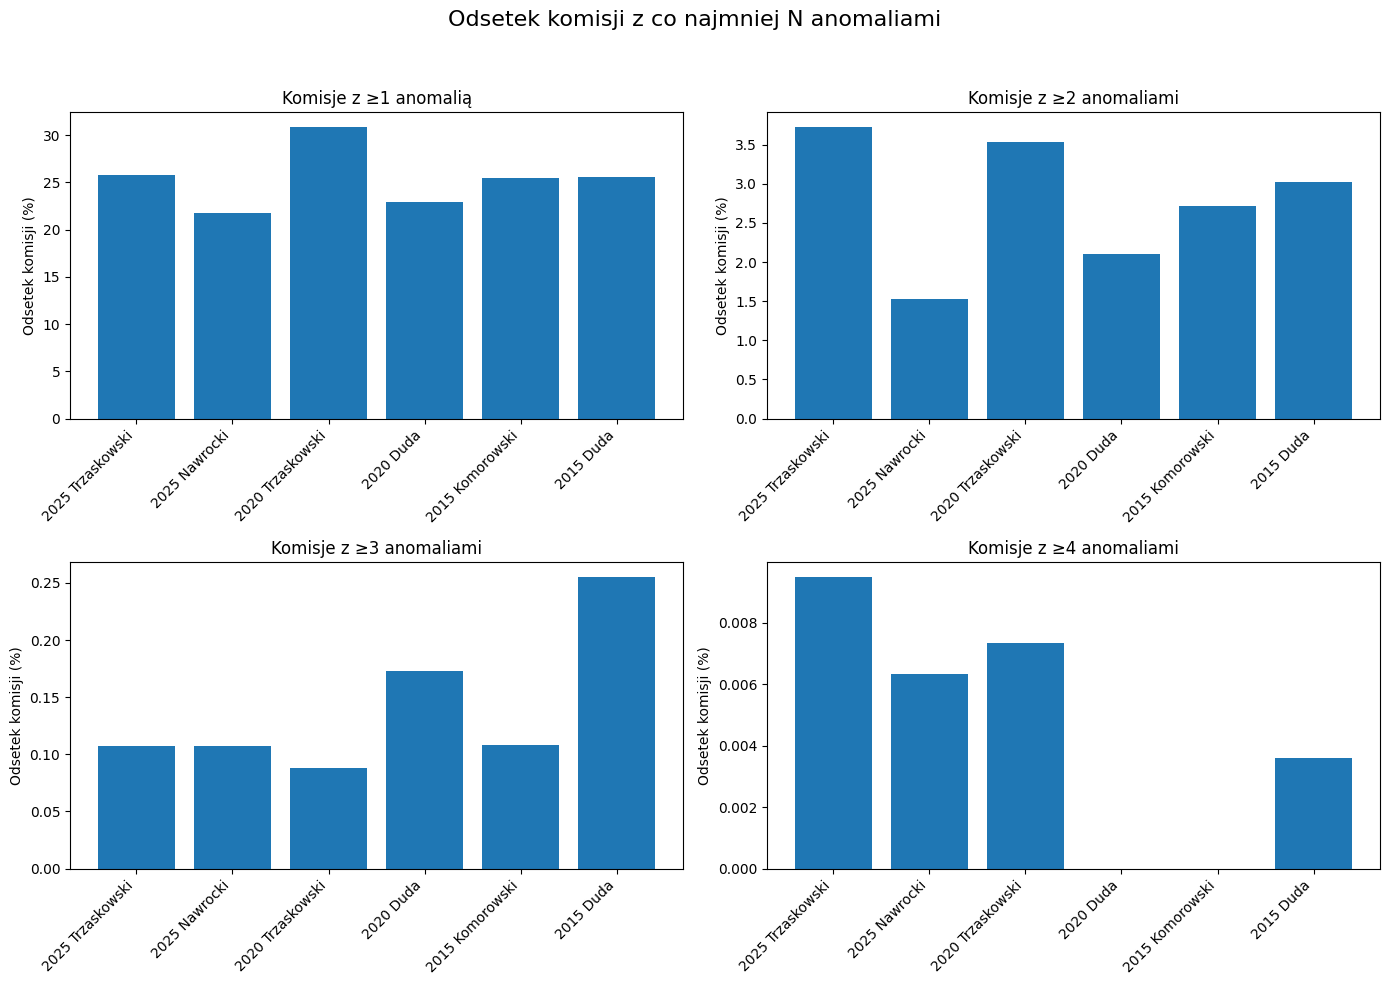

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane skumulowane: co najmniej N anomalii
data = {
    "Rok": [2025, 2025, 2020, 2020, 2015, 2015],
    "Kandydat": ["Trzaskowski", "Nawrocki", "Trzaskowski", "Duda", "Komorowski", "Duda"],
    "≥1": [8161, 6871, 8406, 6243, 7073, 7124],
    "≥2": [1179, 483, 962, 571, 756, 842],
    "≥3": [34, 34, 24, 47, 30, 71],
    "≥4": [3, 2, 2, 0, 0, 1]
}

komisje = {2025: 31627, 2020: 27221, 2015: 27817}

df = pd.DataFrame(data)
df["Grupa"] = df["Rok"].astype(str) + " " + df["Kandydat"]
df["Komisje"] = df["Rok"].map(komisje)

# Oblicz odsetki dla ≥N anomalii
df["min 1"] = df["≥1"] / df["Komisje"] * 100
df["min 2"] = df["≥2"] / df["Komisje"] * 100
df["min 3"] = df["≥3"] / df["Komisje"] * 100
df["min 4"] = df["≥4"] / df["Komisje"] * 100

# Przygotowanie
plot_df = df.set_index("Grupa")[["min 1", "min 2", "min 3", "min 4"]]
titles = {
    "min 1": "Komisje z ≥1 anomalią",
    "min 2": "Komisje z ≥2 anomaliami",
    "min 3": "Komisje z ≥3 anomaliami",
    "min 4": "Komisje z ≥4 anomaliami"
}

# Rysowanie
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(plot_df.columns):
    ax = axs[i // 2, i % 2]
    ax.bar(plot_df.index, plot_df[col])
    ax.set_title(titles[col])
    ax.set_ylabel("Odsetek komisji (%)")
    ax.set_xticklabels(plot_df.index, rotation=45, ha="right")

fig.suptitle("Odsetek komisji z co najmniej N anomaliami", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
